In [1]:
#from ensemble import RegressionEnsemble, MixedRegressionEnsemble, BootstrapEnsemble, ShuffleEnsemble
import ensemble
import importlib
importlib.reload(ensemble)

from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import RadiusNeighborsRegressor, KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.svm import SVR

import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 5]

from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split

from sklearn.datasets import make_regression

# Toy dataset
from http://scikit-learn.org/stable/auto_examples/tree/plot_tree_regression.html

In [2]:
# Create a random dataset
rng = np.random.RandomState(1)
X = np.sort(5 * rng.rand(80, 1), axis=0)
y = np.sin(X).ravel()
y[::5] += 3 * (0.5 - rng.rand(16))

# Fit regression model
forest_regression = ensemble.RegressionEnsemble()
forest_regression.fit(X, y)

# Predict
X_test = np.arange(0.0, 5.0, 0.01)[:, np.newaxis]
y_forest,std_forest = forest_regression.predict(X_test,std=True)

# Plot the results
#plt.figure()
#plt.scatter(X, y, s=20, edgecolor="black",
#            c="darkorange", label="data")
#plt.plot(X_test, y_forest, color="cornflowerblue",
#        label="max_depth=2", linewidth=2)
#plt.plot(X_test,std_forest,color="black")

#plt.xlabel("data")
#plt.ylabel("target")
#plt.title("Decision Tree Regression")
#plt.legend()
#plt.show()

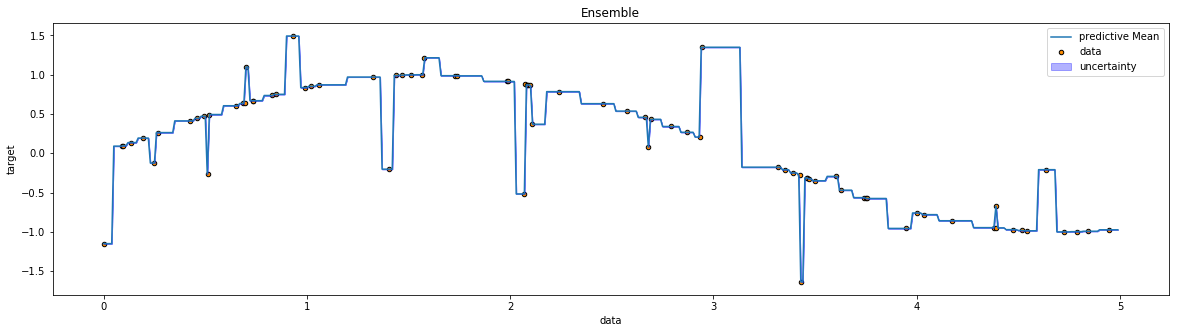

In [3]:
forest_regression.scatterplot(X_test,X=X,y=y)

# Mixed Models

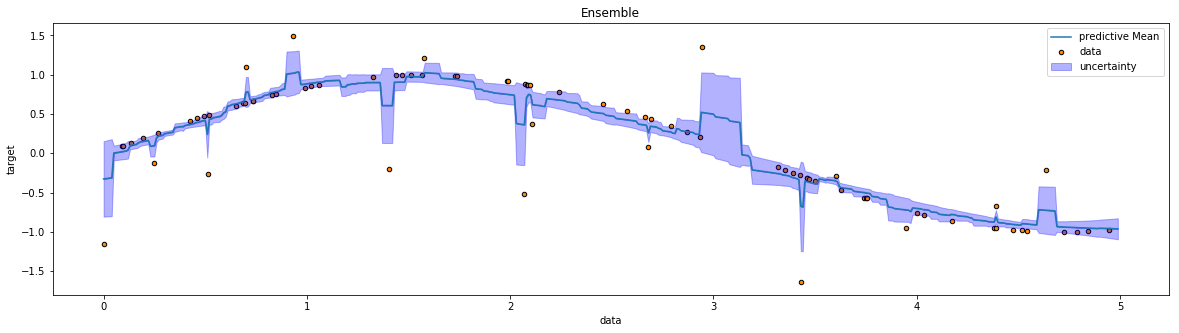

In [4]:
mixed_ensemble = ensemble.MixedRegressionEnsemble(models = [DecisionTreeRegressor(),
                                                            #LinearRegression(),
                                                            KNeighborsRegressor(),
                                                            MLPRegressor(max_iter=1000),
                                                           SVR()])
mixed_regression = mixed_ensemble#DecisionTreeRegressor(max_depth=5)
mixed_regression.fit(X, y)
y_mixed,std_mixed = mixed_regression.predict(X_test,std=True)

mixed_ensemble.scatterplot(X_test,X=X,y=y)

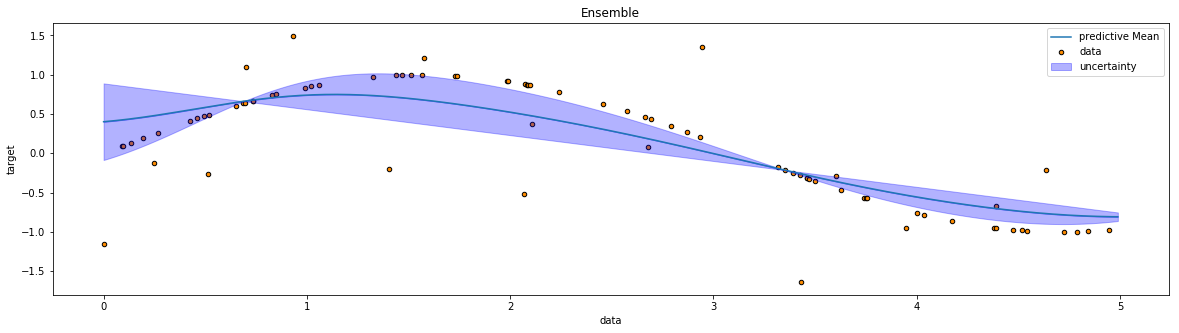

In [5]:
mixed_ensemble_2 = ensemble.MixedRegressionEnsemble(models = [#DecisionTreeRegressor(),
                                                            LinearRegression(),
                                                            #KNeighborsRegressor(),
                                                            #MLPRegressor(max_iter=1000),
                                                           SVR()
                                                             ])
mixed_regression = mixed_ensemble_2#DecisionTreeRegressor(max_depth=5)
mixed_regression.fit(X, y)
y_mixed,std_mixed = mixed_ensemble_2.predict(X_test,std=True)

mixed_ensemble_2.scatterplot(X_test,X=X,y=y)

# Bootstrap

In [6]:
bootstrap_ensemble = ensemble.BootstrapEnsemble()
bootstrap_regression = bootstrap_ensemble#DecisionTreeRegressor(max_depth=5)
bootstrap_regression.fit(X, y)

# Predict
y_bootstrap,std_bootstrap = bootstrap_regression.predict(X_test,std=True)



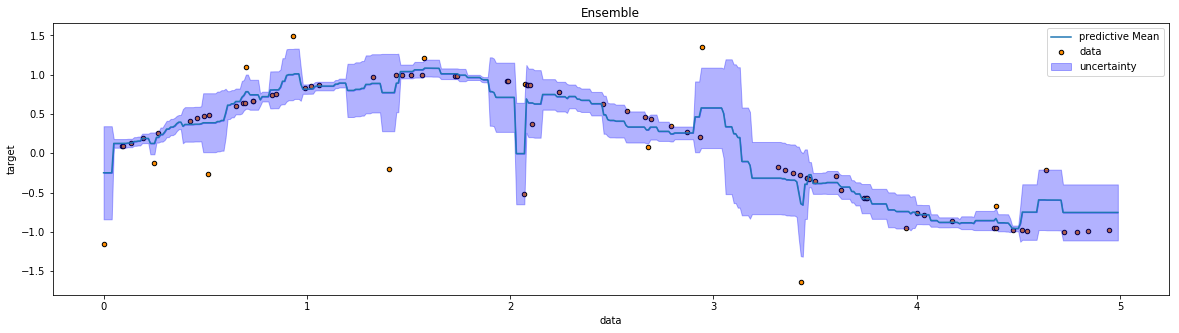

In [7]:
bootstrap_ensemble.scatterplot(X_test,X=X,y=y)

# Different Data shuffling

In [8]:
shuffle_ensemble = ensemble.ShuffleEnsemble()

In [9]:
shuffle_regression = shuffle_ensemble#DecisionTreeRegressor(max_depth=5)
shuffle_regression.fit(X, y)

# Predict
y_shuffle,std_shuffle = shuffle_regression.predict(X_test,std=True)



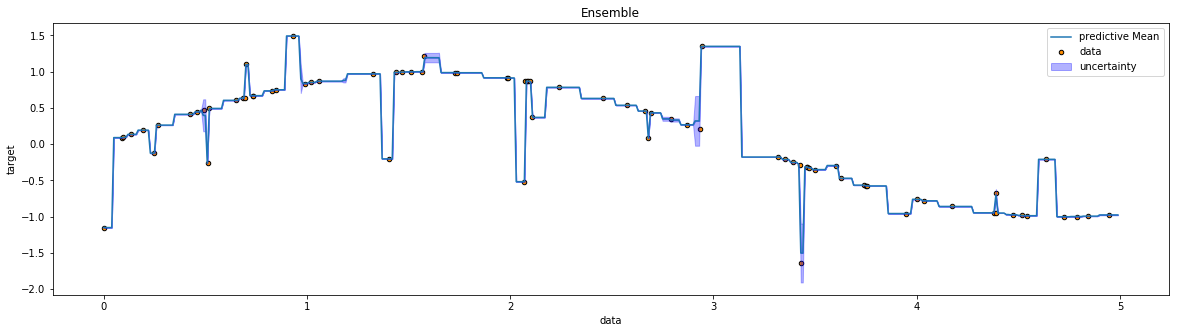

In [10]:
shuffle_ensemble.scatterplot(X_test,X=X,y=y)

# Linear Case

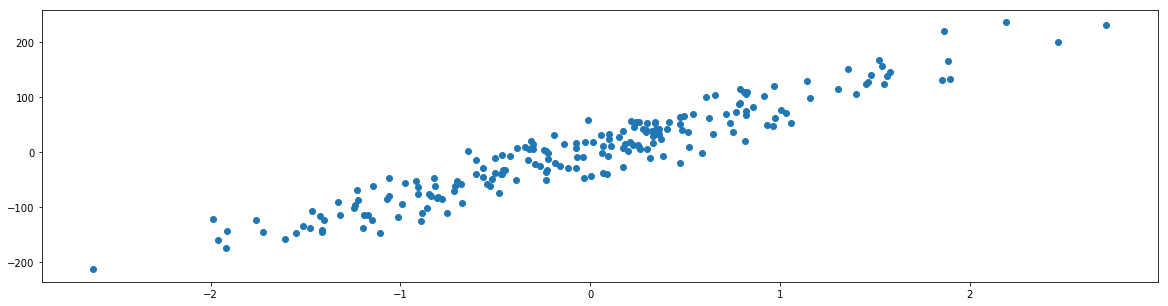

In [36]:
X, y = make_regression(n_samples=200, n_features=1, noise=25,random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
plt.scatter(X,y)

## TreeEnsemble

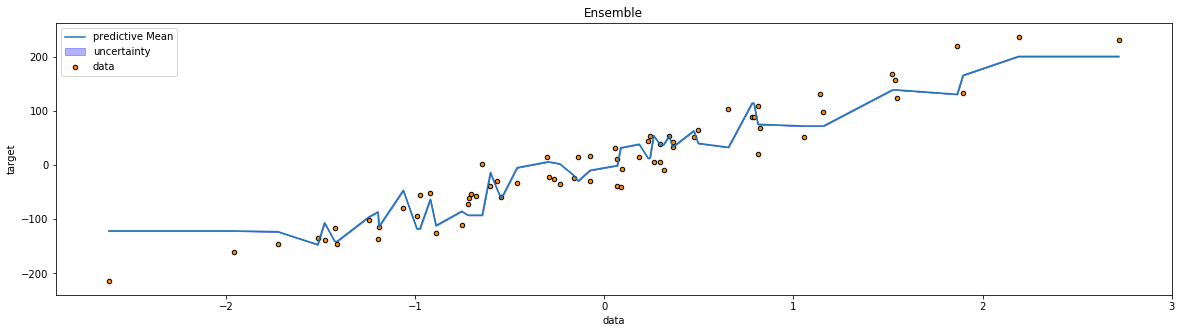

In [45]:
treeEnsemble = ensemble.RegressionEnsemble(10,DecisionTreeRegressor)
treeEnsemble.fit(X_train,y_train)
y_hat,std  = treeEnsemble.predict(X_test,std=True)
treeEnsemble.mutli_dimenstional_scatterplot(X_test,y_test,figsize=(20,5))

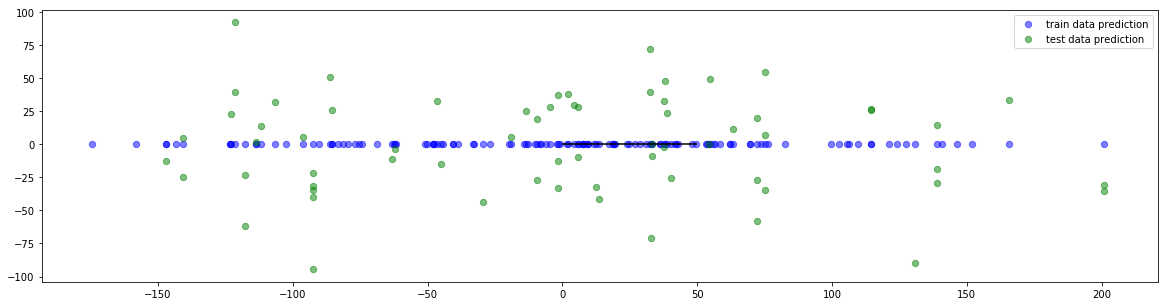

In [48]:
treeEnsemble.plot_residuals(X_train,y_train,X_test,y_test)

## Mixed Ensemble

/Users/thomas/anaconda/envs/tfdeeplearning/lib/python3.5/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


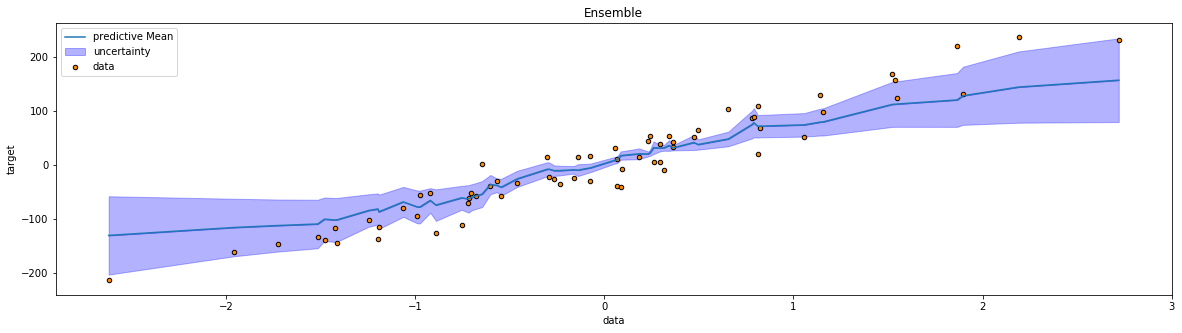

In [39]:
mixed_ensemble = ensemble.MixedRegressionEnsemble(models = [DecisionTreeRegressor(),
                                                            LinearRegression(),
                                                            KNeighborsRegressor(),
                                                            MLPRegressor(max_iter=2000),
                                                           SVR()])
mixed_ensemble.fit(X_train,y_train)
y_hat,std  = mixed_ensemble.predict(X_test,std=True)
mixed_ensemble.mutli_dimenstional_scatterplot(X_test,y_test,figsize=(20,5))

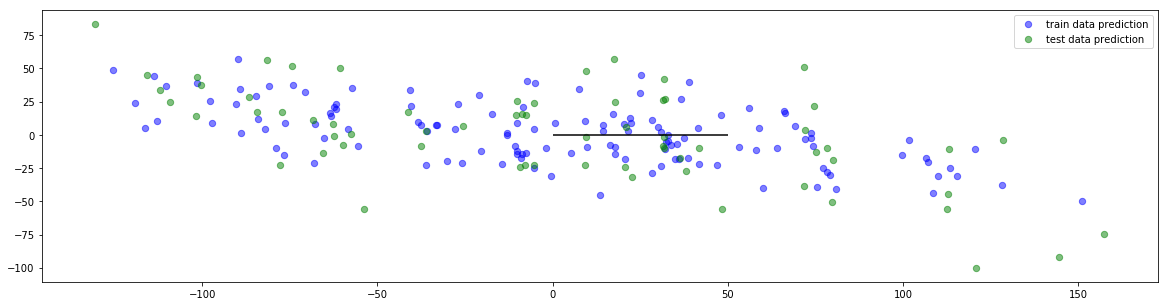

In [46]:
mixed_ensemble.plot_residuals(X_train,y_train,X_test,y_test)

## Bootstrap


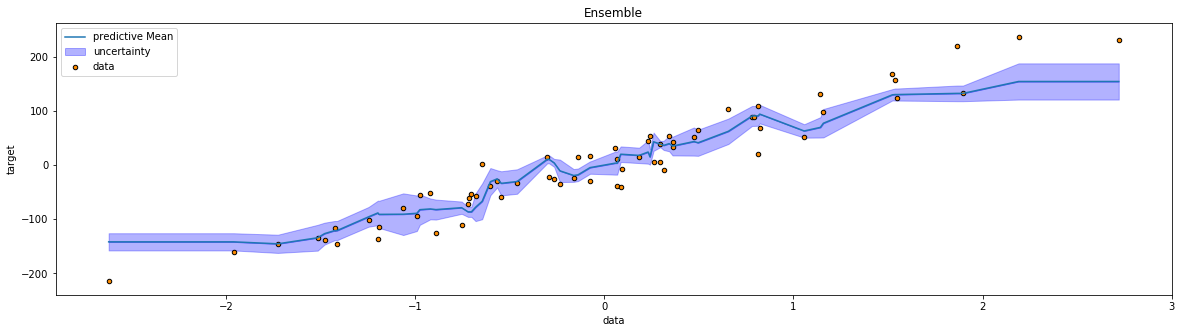

In [40]:
bootstrap_ensemble = ensemble.BootstrapEnsemble()


bootstrap_ensemble.fit(X_train,y_train)
y_hat,std  = bootstrap_ensemble.predict(X_test,std=True)
bootstrap_ensemble.mutli_dimenstional_scatterplot(X_test,y_test,figsize=(20,5))

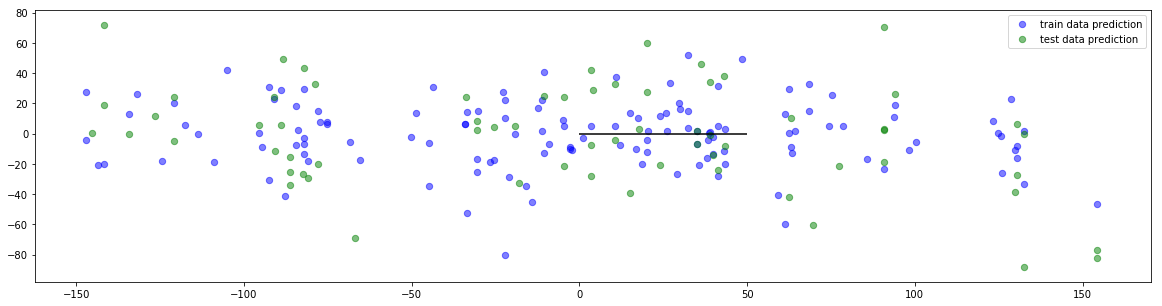

In [49]:
bootstrap_ensemble.plot_residuals(X_train,y_train,X_test,y_test)

## different Data Shuffling

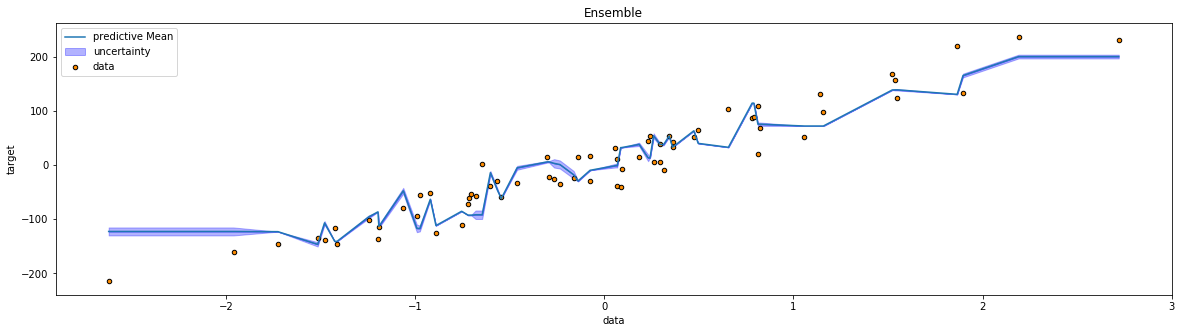

In [42]:
shuffle_ensemble = ensemble.ShuffleEnsemble(100)
shuffle_ensemble.fit(X_train,y_train)
y_hat,std  = shuffle_ensemble.predict(X_test,std=True)
shuffle_ensemble.mutli_dimenstional_scatterplot(X_test,y_test,figsize=(20,5))

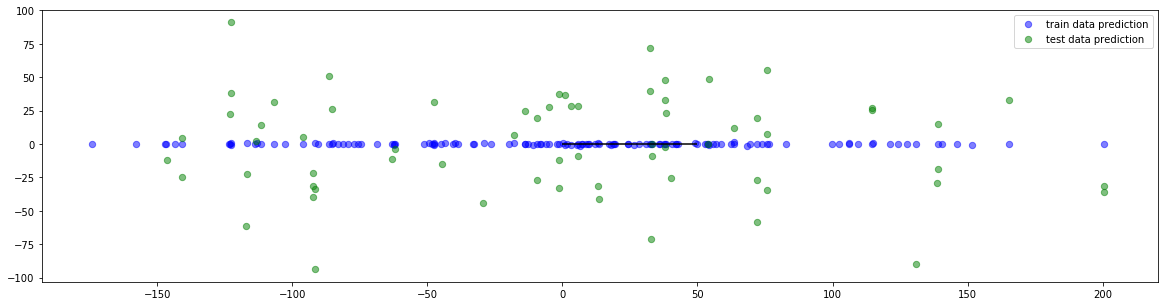

In [50]:
shuffle_ensemble.plot_residuals(X_train,y_train,X_test,y_test)

# Boston Housing Prices ([:,5 is rooms per venue])

In [17]:
boston = load_boston()
y = boston.target
X = boston.data

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

## TreeEnsemble

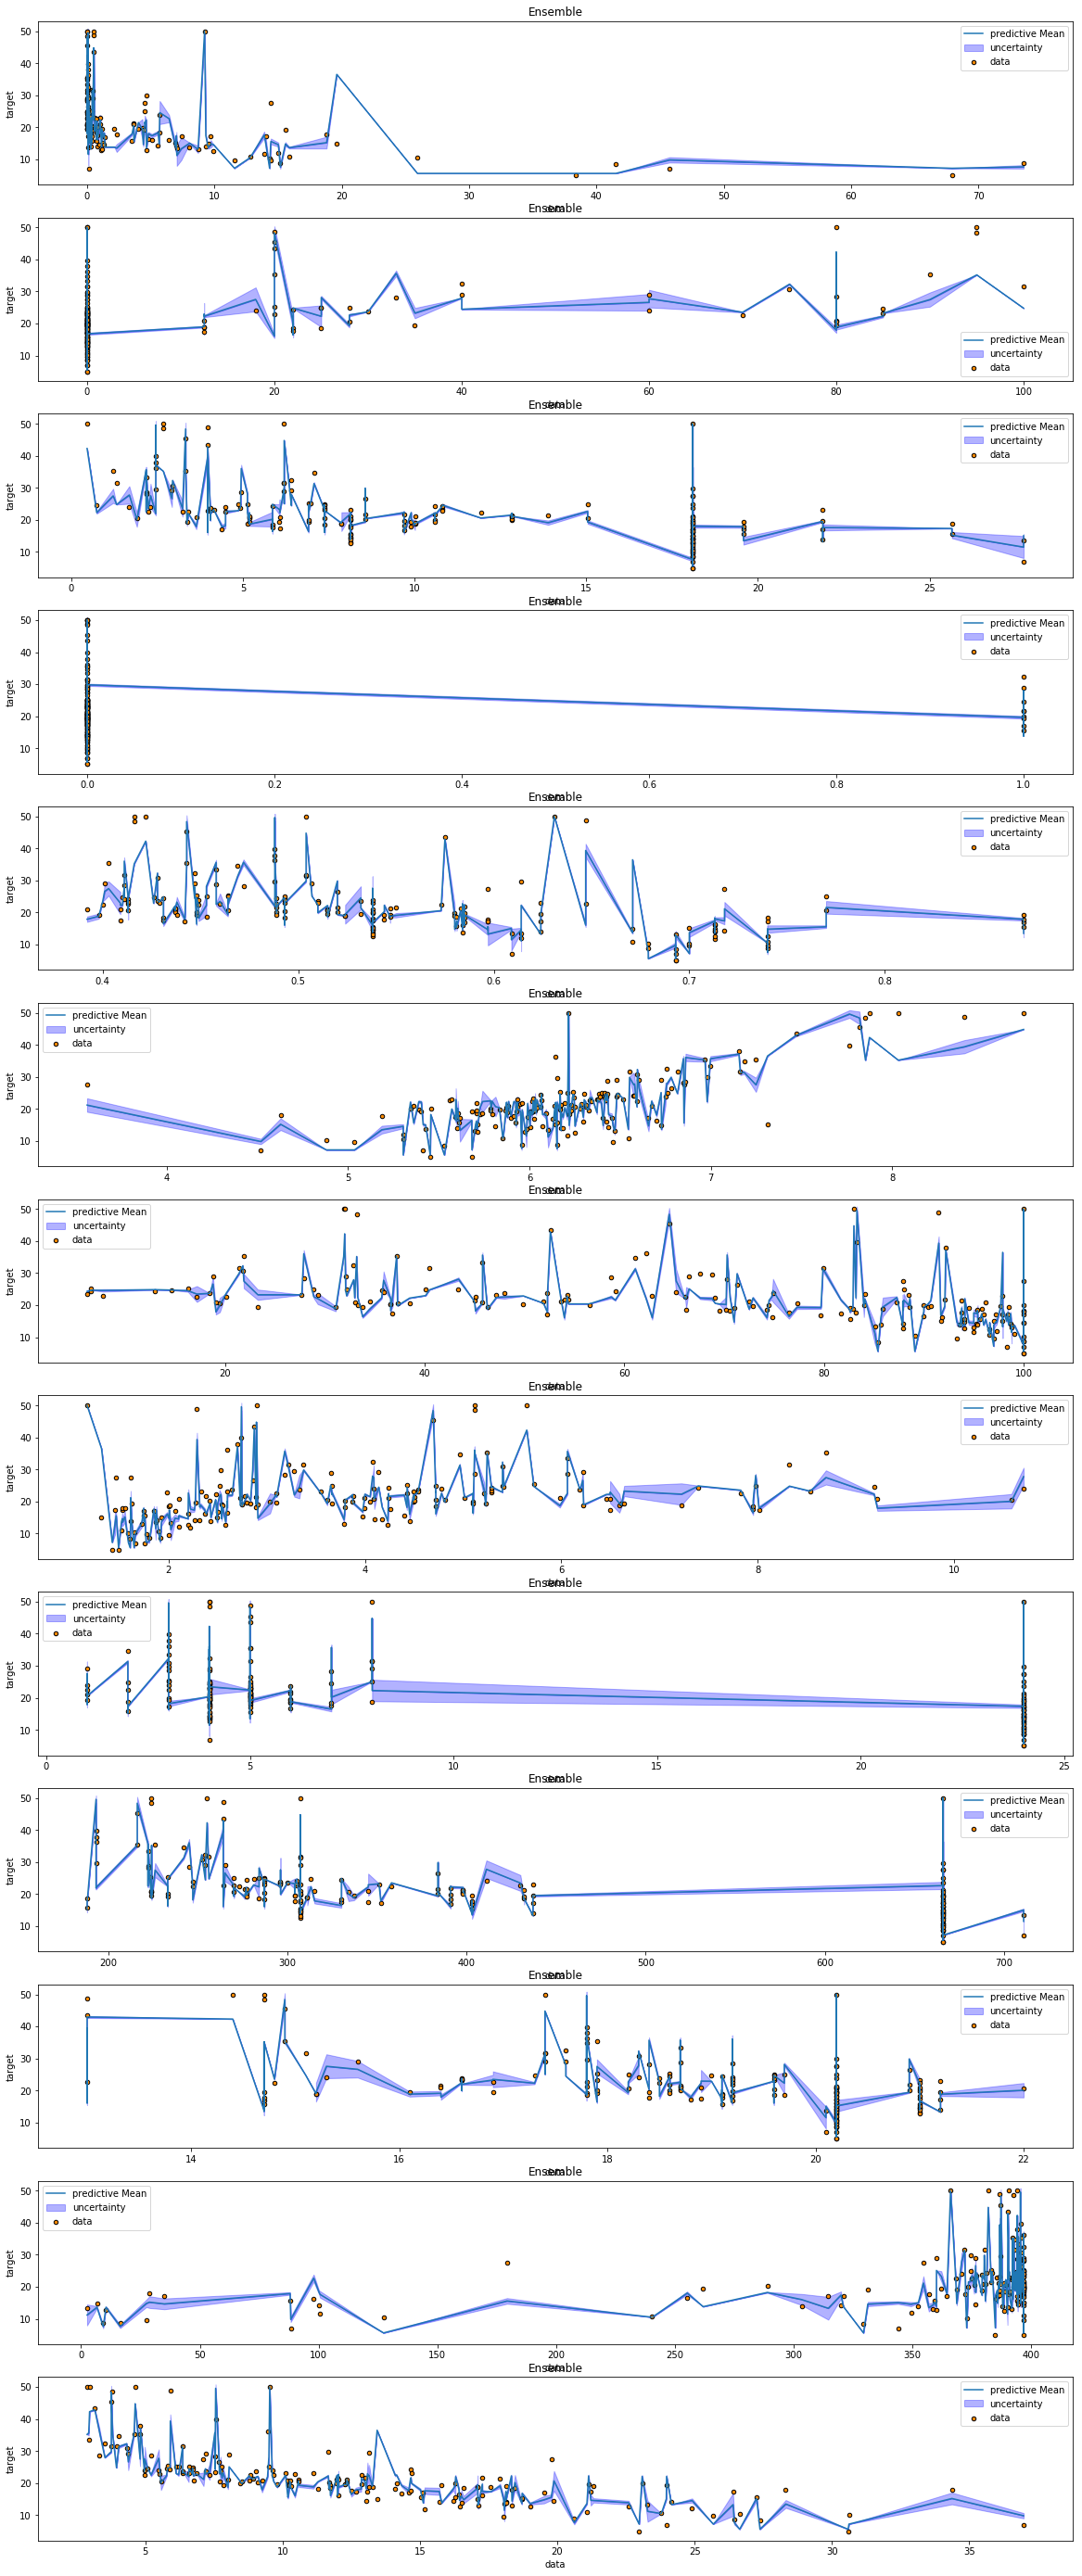

In [18]:
treeEnsemble = ensemble.RegressionEnsemble(10,DecisionTreeRegressor)
treeEnsemble.fit(X_train,y_train)
y_hat,std  = treeEnsemble.predict(X_test,std=True)
treeEnsemble.mutli_dimenstional_scatterplot(X_test,y_test)

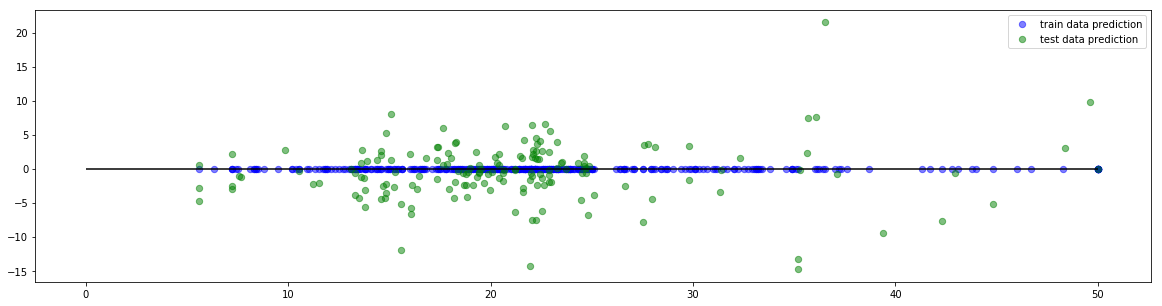

In [19]:
treeEnsemble.plot_residuals(X_train,y_train,X_test,y_test)

In [20]:
treeEnsemble.self_evaluate(X_test,y_test)

{'correlation between error and variance': -0.029019242038459115,
 'coverage probability': 0.1317365269461078,
 'error normalcy': 244.2150239963047,
 'rsme': 4.262507274301483}

## Mixed Ensemble

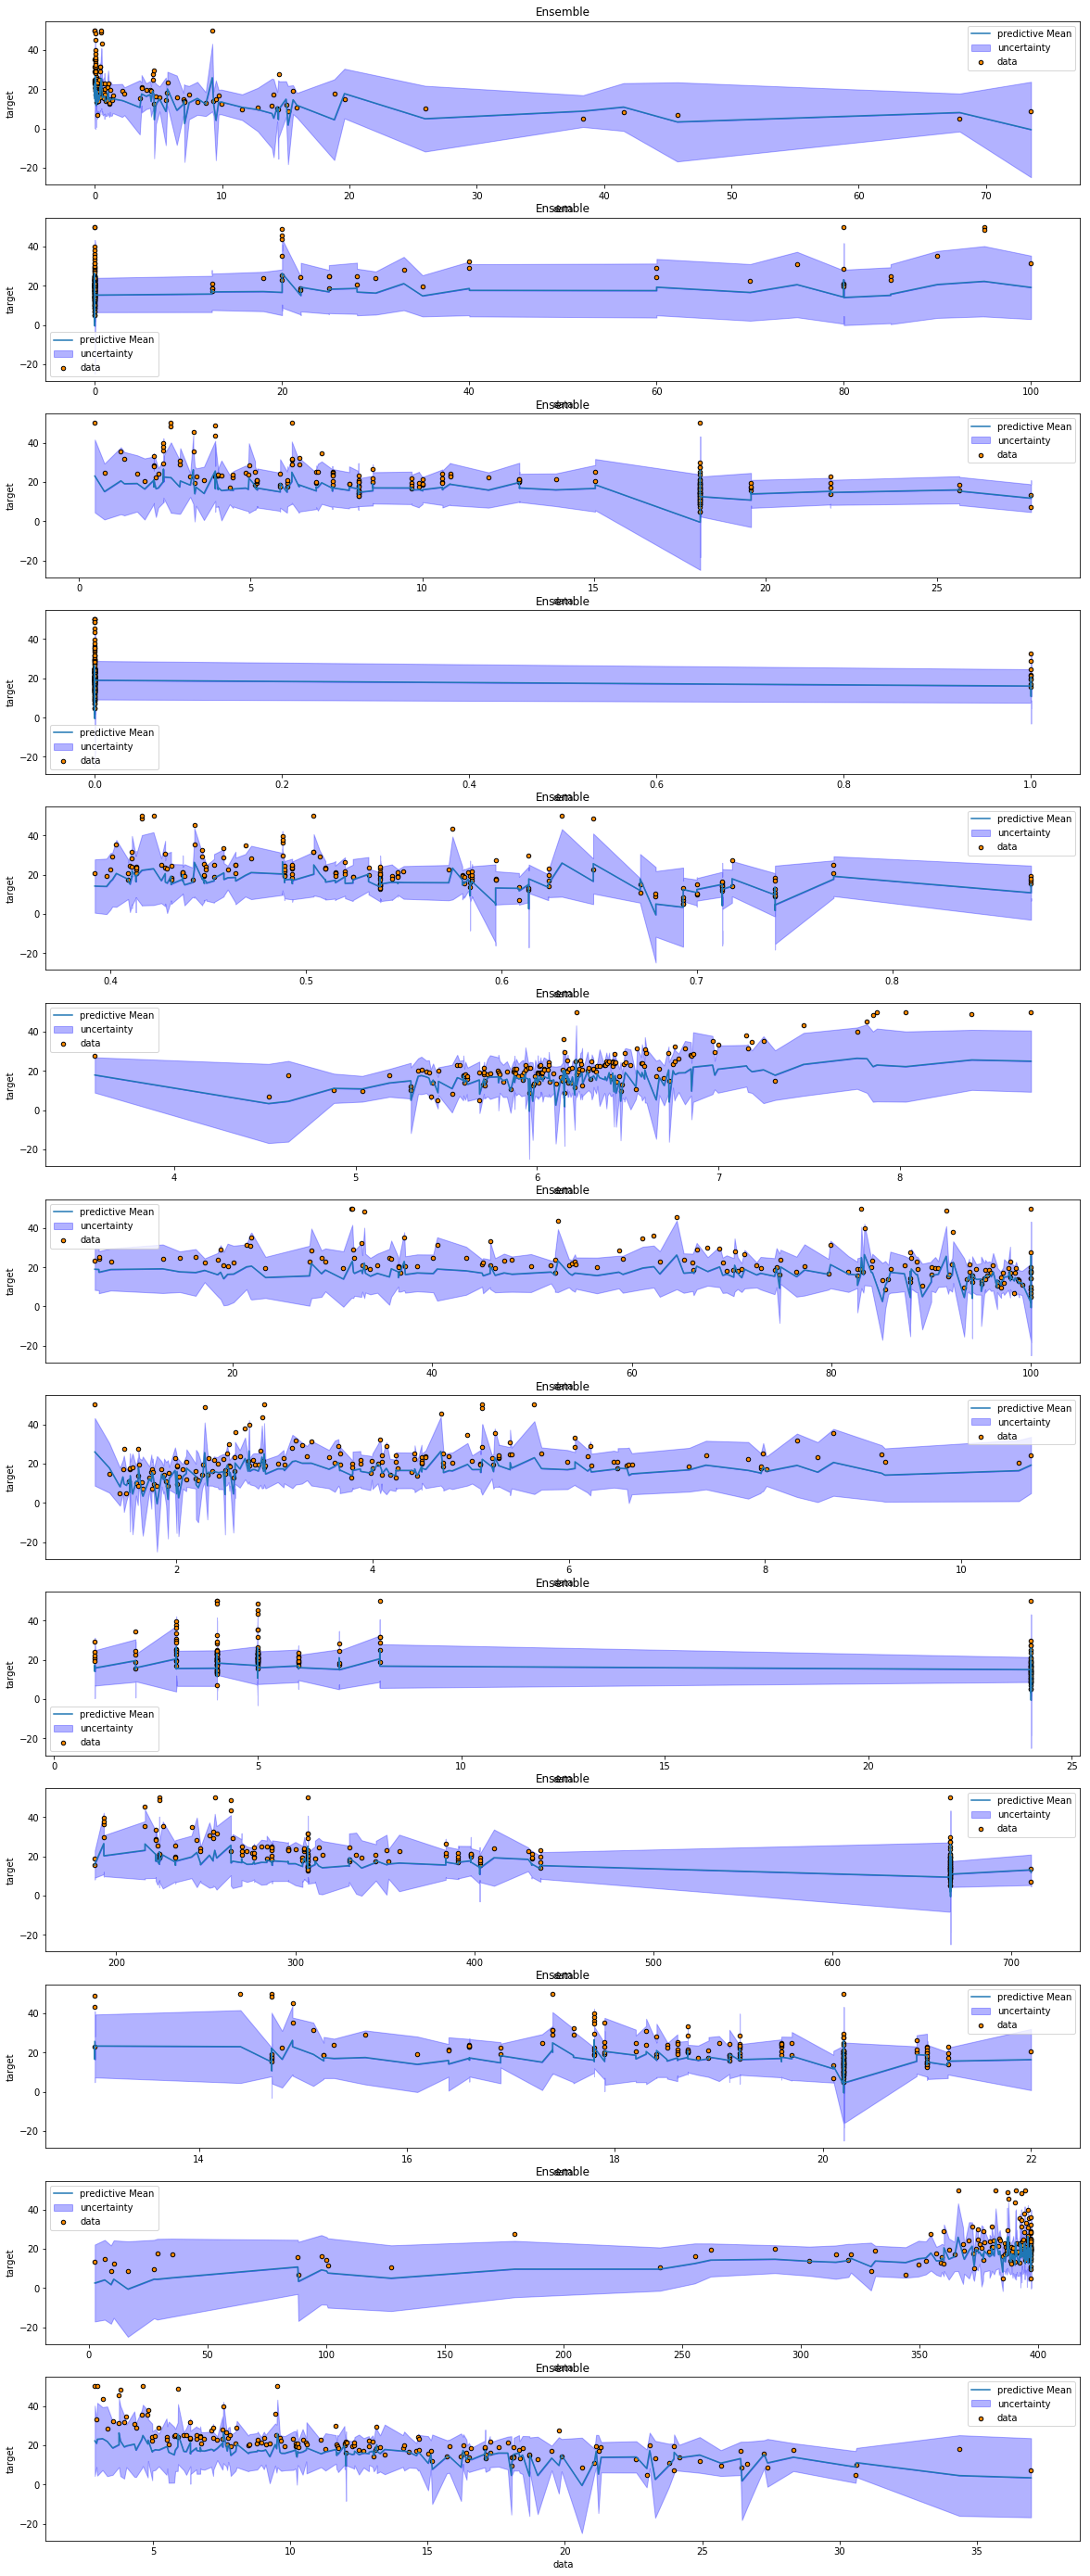

In [21]:
mixed_ensemble = ensemble.MixedRegressionEnsemble(models = [DecisionTreeRegressor(),
                                                            #LinearRegression(),
                                                            KNeighborsRegressor(),
                                                            MLPRegressor(max_iter=1000),
                                                           SVR()])
mixed_ensemble.fit(X_train,y_train)
y_hat,std  = mixed_ensemble.predict(X_test,std=True)
mixed_ensemble.mutli_dimenstional_scatterplot(X_test,y_test)

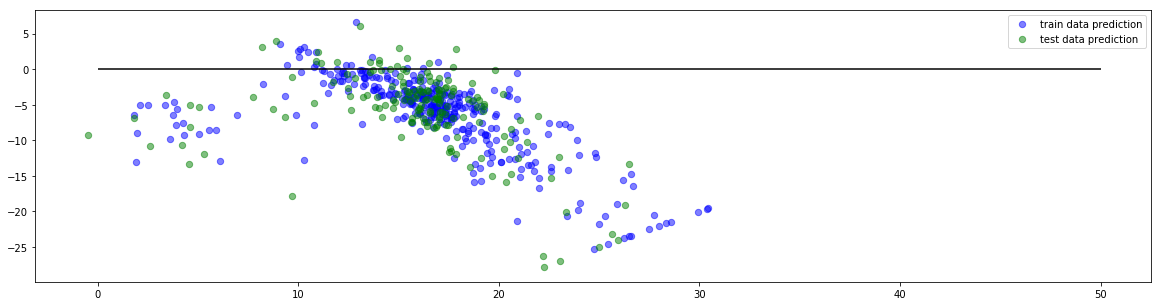

In [22]:
mixed_ensemble.plot_residuals(X_train,y_train,X_test,y_test)

In [23]:
mixed_ensemble.self_evaluate(X_test,y_test)

{'correlation between error and variance': 0.49718078403595917,
 'coverage probability': 0.8922155688622755,
 'error normalcy': 150.33396277157226,
 'rsme': 8.250534142572171}

## Bootstrap

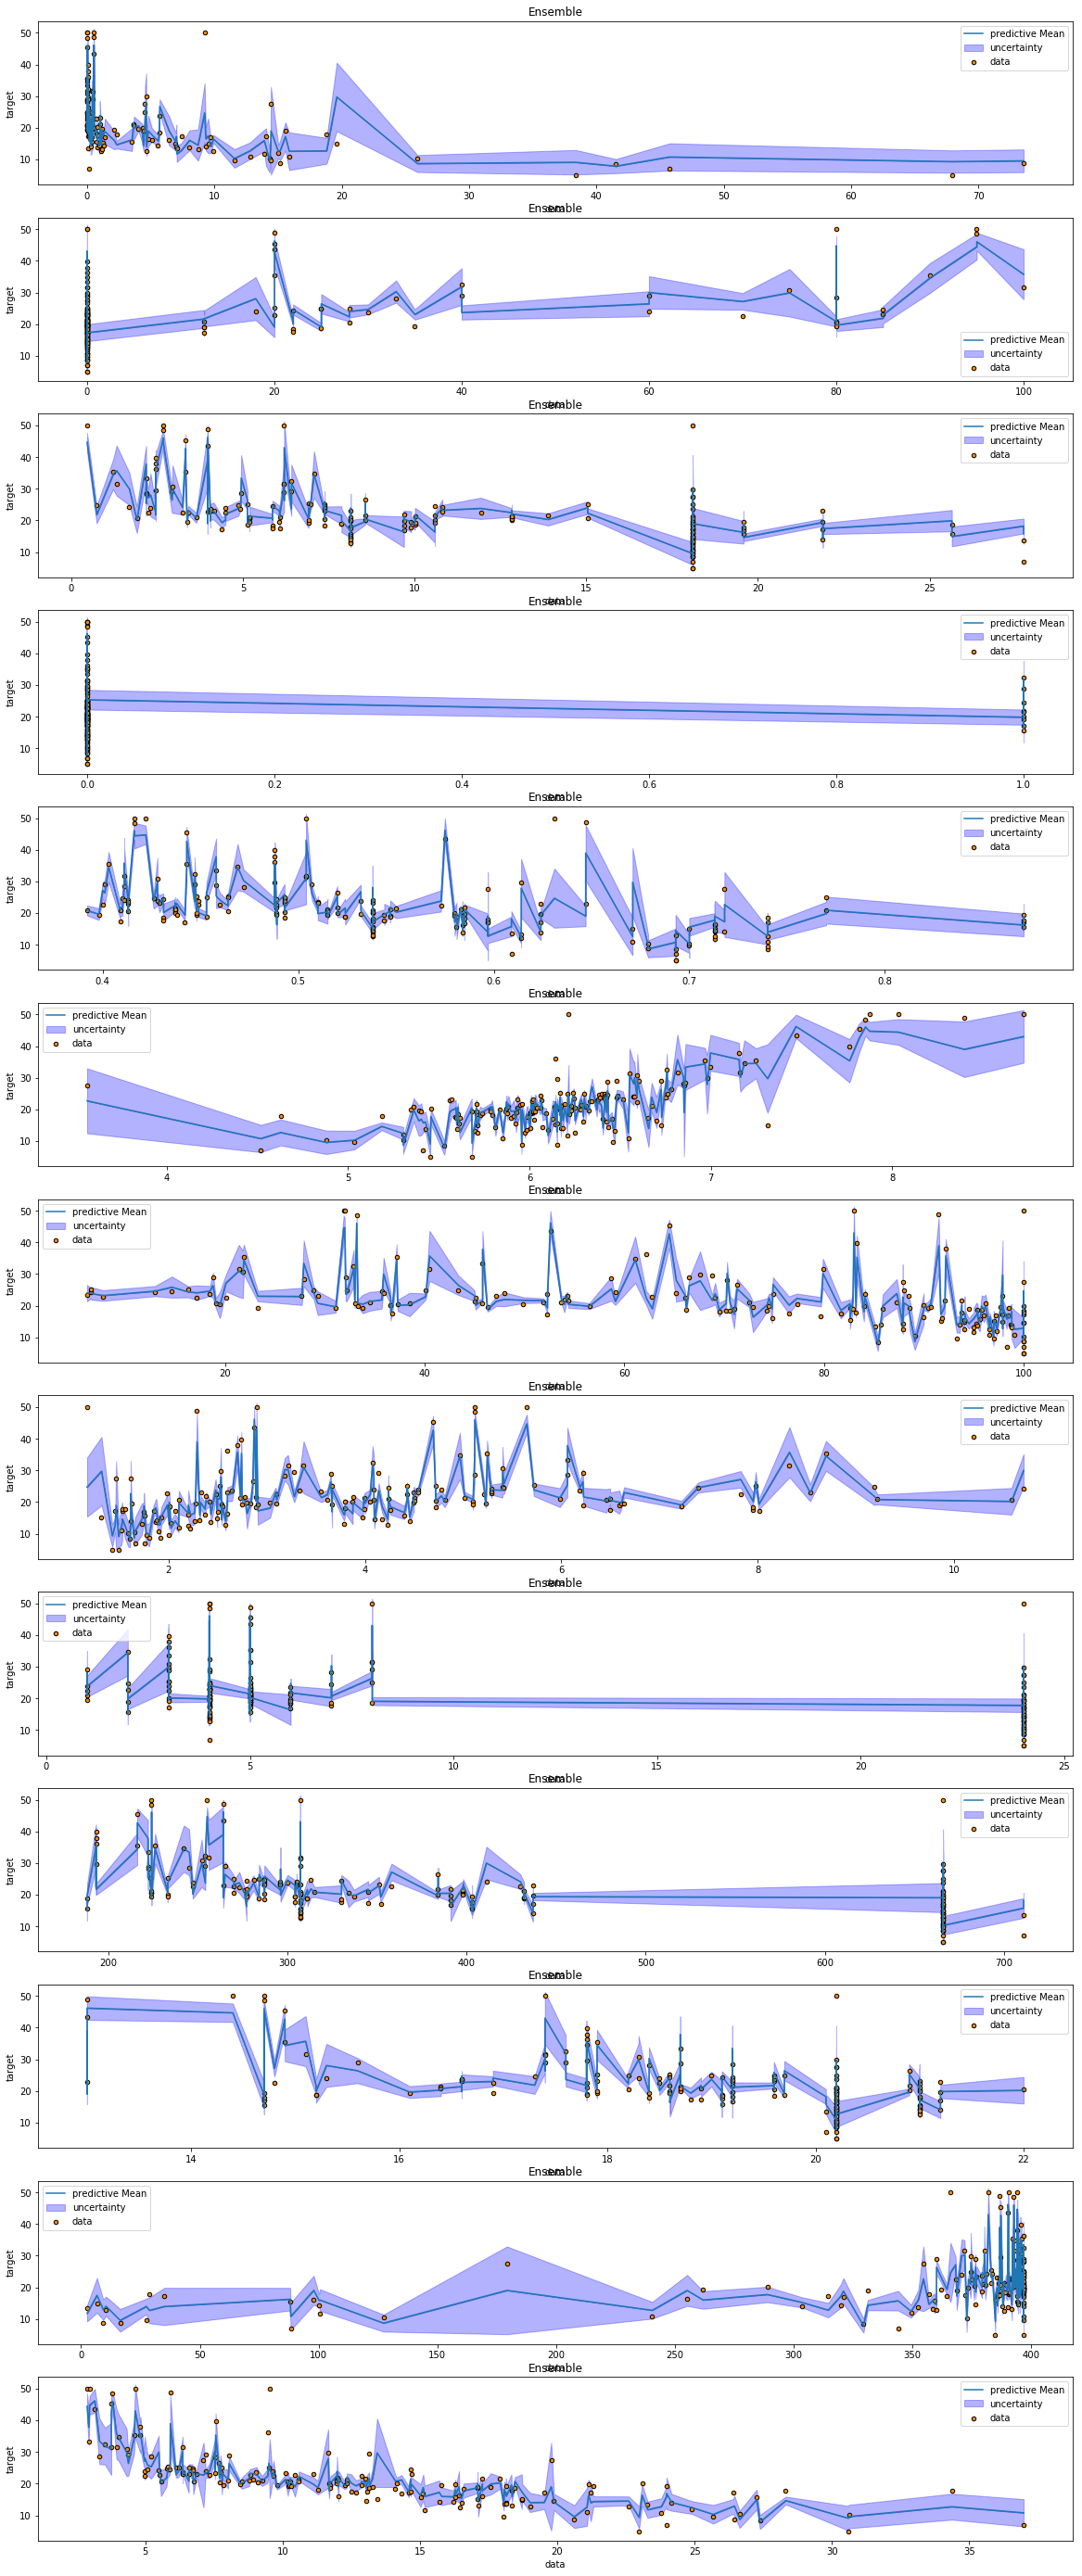

In [24]:
bootstrap_ensemble = ensemble.BootstrapEnsemble()


bootstrap_ensemble.fit(X_train,y_train)
y_hat,std  = bootstrap_ensemble.predict(X_test,std=True)
bootstrap_ensemble.mutli_dimenstional_scatterplot(X_test,y_test)

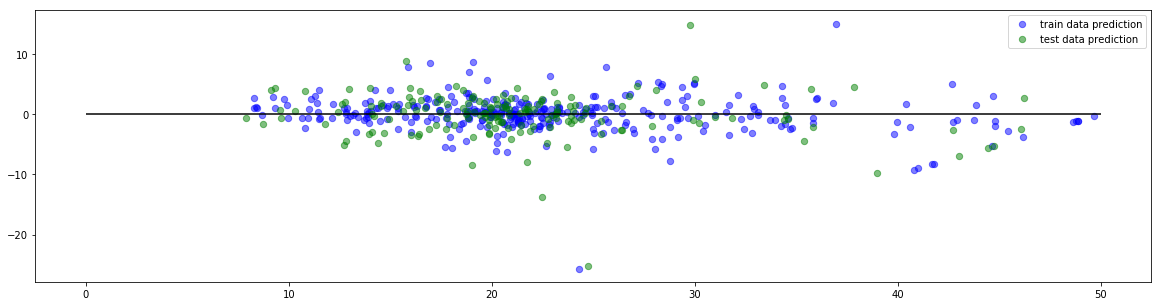

In [25]:
bootstrap_ensemble.plot_residuals(X_train,y_train,X_test,y_test)

In [26]:
bootstrap_ensemble.self_evaluate(X_test,y_test)

{'correlation between error and variance': 0.3740248184974901,
 'coverage probability': 0.6826347305389222,
 'error normalcy': 312.7227770137822,
 'rsme': 3.771627136593042}

## Different Data Shuffling

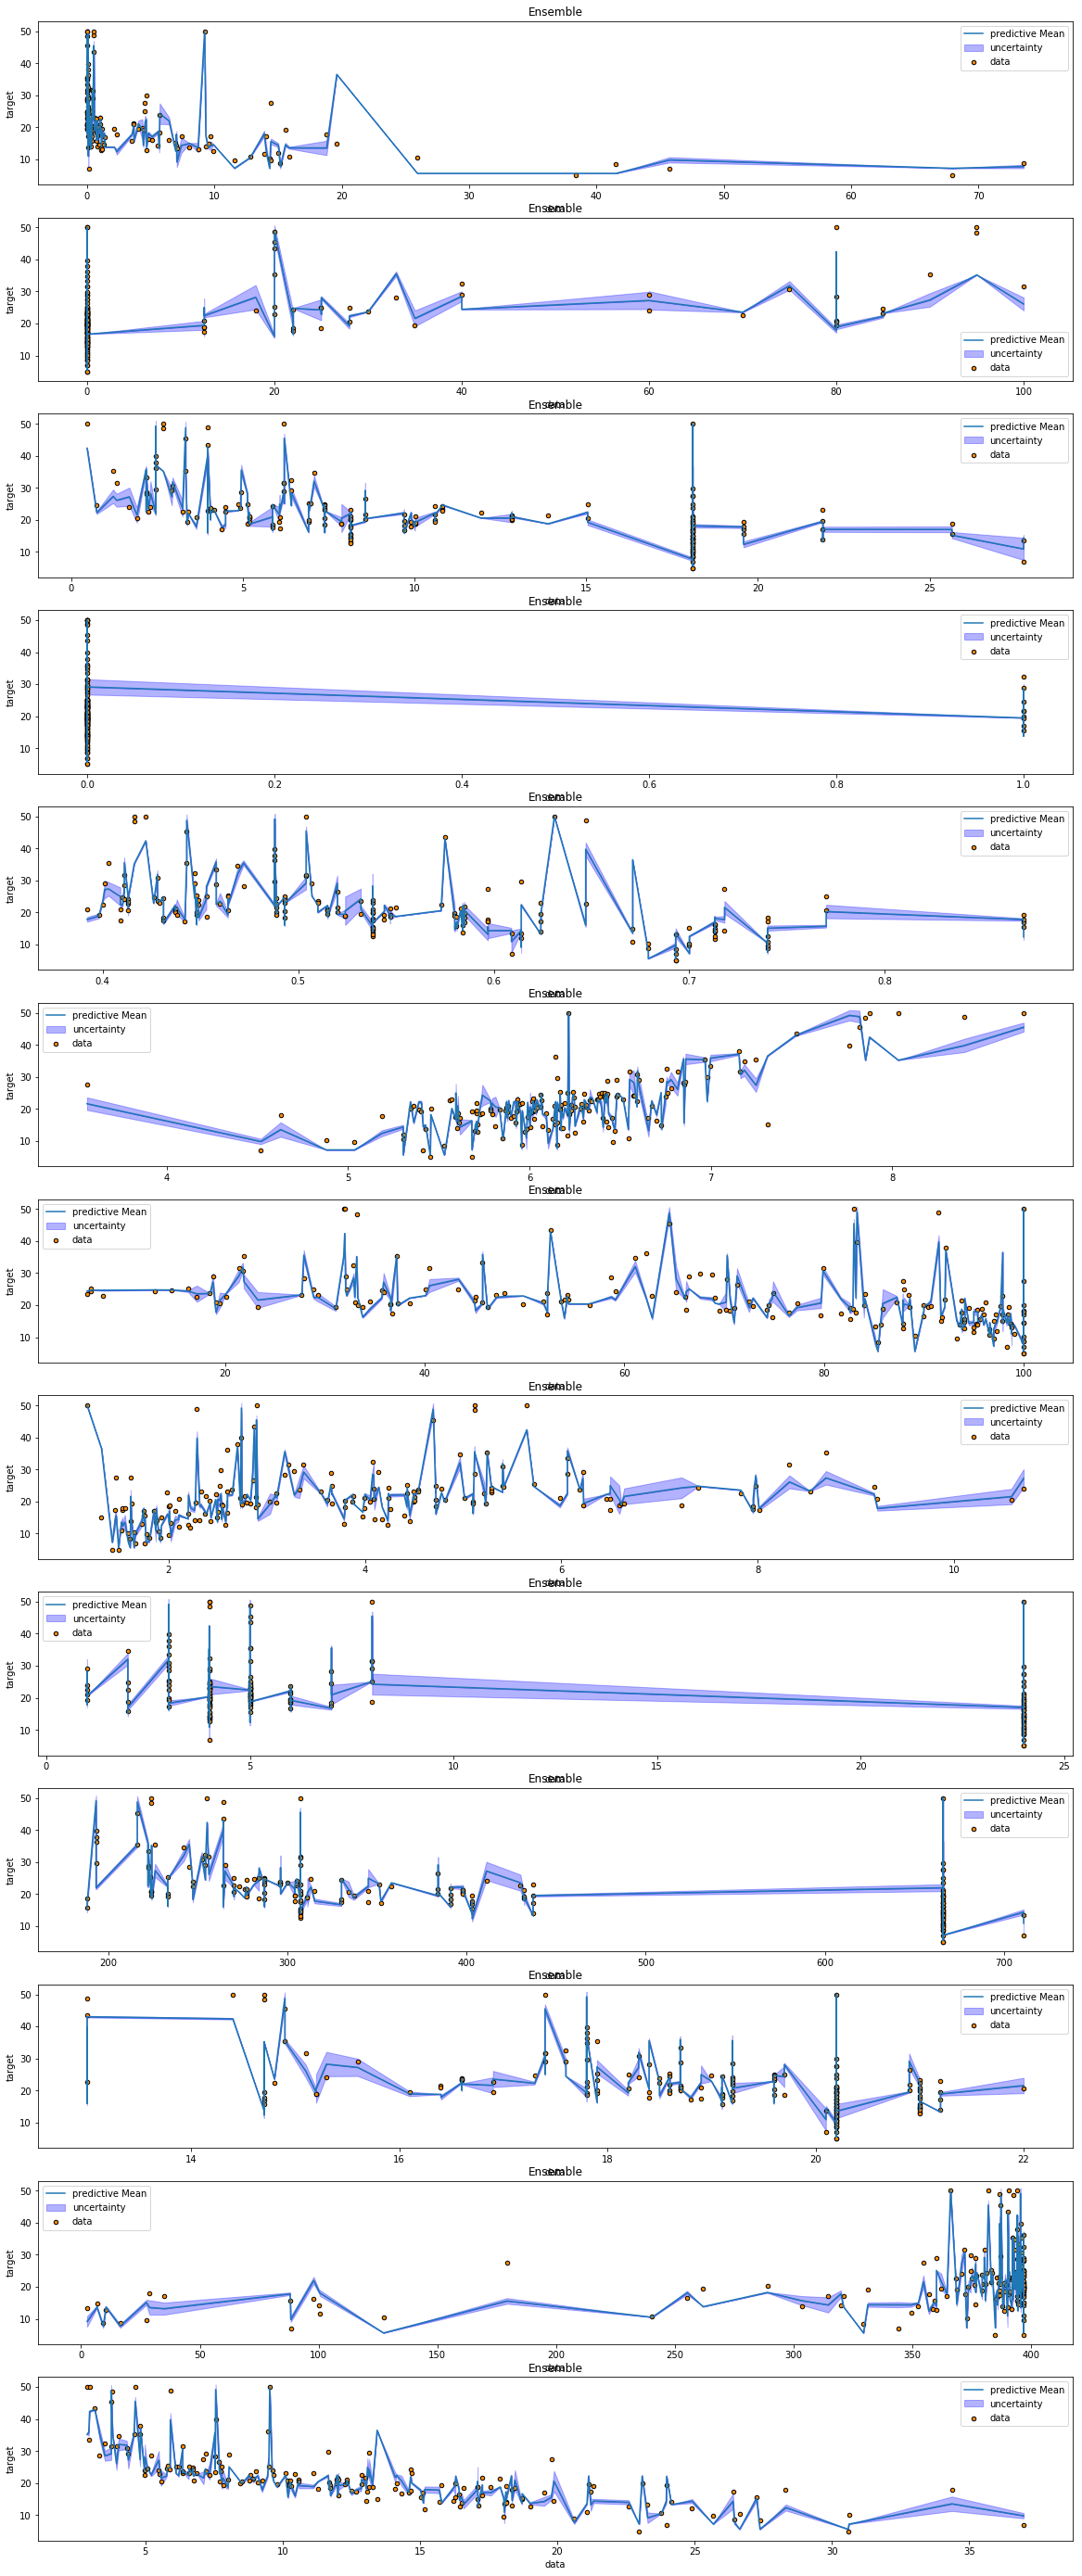

In [27]:
shuffle_ensemble = ensemble.ShuffleEnsemble()
shuffle_ensemble.fit(X_train,y_train)
y_hat,std  = shuffle_ensemble.predict(X_test,std=True)
shuffle_ensemble.mutli_dimenstional_scatterplot(X_test,y_test)

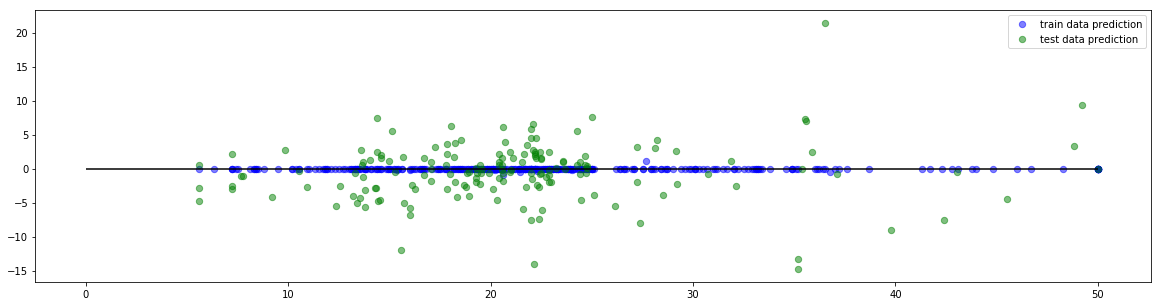

In [28]:
shuffle_ensemble.plot_residuals(X_train,y_train,X_test,y_test)

In [29]:
shuffle_ensemble.self_evaluate(X_test,y_test)

{'correlation between error and variance': -0.02563230272034104,
 'coverage probability': 0.15568862275449102,
 'error normalcy': 246.31906876346522,
 'rsme': 4.2919040203341545}